 # TP1. Fully Connected Networks
 
 #### Université Jean-Monnet, 2019-2020

## Part 2. Classification on Images

## 1.2. Mnist Dataset

Load MNIST data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train_original = y_train
y_test_original = y_test

print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

train data:	 (60000, 28, 28) (60000,)
test data:	 (10000, 28, 28) (10000,)


MNIST contains handwriting data of 10 numbers; each image has size 28 * 28. The following are some examples

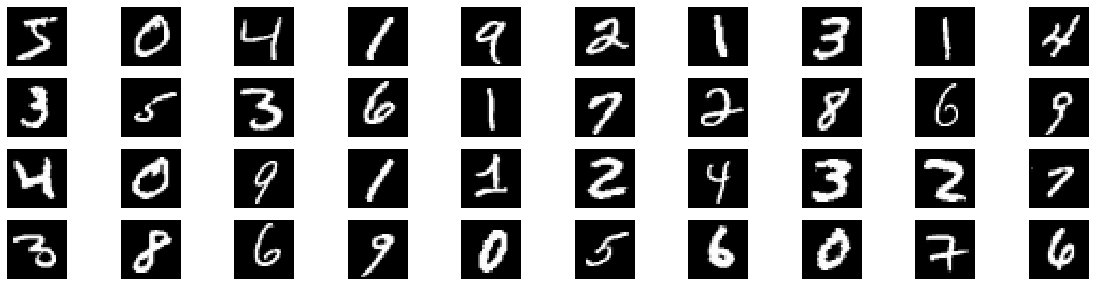

labels:  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6]


In [5]:
plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i].reshape((28, 28))
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])

**Question 1: Each data point now has size 28 x 28. Reshape them to size 784 to feed to the fully connected neural net** 

In [36]:
x_train = x_train.flatten().reshape(60000, 784)
# x_train = x_train.reshape(60000,28,28)
x_test = x_test.flatten().reshape(10000, 784)



**Question 2: Use Keras to_categorical to convert labels to categorical type**

In [49]:
y_train = y_train_original
y_train =  to_categorical(y_train)

y_test = y_test_original
y_test =  to_categorical(y_test)
print(np.shape(y_train))
print(y_train[:3])


(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

**Question 3: Write a feed-forward model to train MNIST** 

In [125]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(100, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(25, activation='relu'))
model.add(Dropout(0.02))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_60 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_61 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_62 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 100)             

**Question 4: Improve the model to 98% accuracy** 

In [126]:
model.fit(x_train, y_train,
          epochs=30,
          batch_size=256)

Epoch 1/30
60000/60000 [==============================] - 4s 72us/step - loss: 2.1748 - accuracy: 0.5302
Epoch 2/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.4878 - accuracy: 0.8728
Epoch 3/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.3407 - accuracy: 0.9156
Epoch 4/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.2733 - accuracy: 0.9347
Epoch 5/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.2323 - accuracy: 0.9446
Epoch 6/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2058 - accuracy: 0.9516
Epoch 7/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.1873 - accuracy: 0.9561
Epoch 8/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1796 - accuracy: 0.9584
Epoch 9/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.1615 - accuracy: 0.9632
Epoch 10/30
60000/60000 [==============================

In [127]:
_, train_acc = model.evaluate(x_train, y_train, batch_size= 256)
_, test_acc = model.evaluate(x_test, y_test, batch_size= 256)
print('train_acc', train_acc)
print('test_acc', test_acc)

10000/10000 [==============================] - 0s 17us/step
train_acc 0.9937666654586792
test_acc 0.9818999767303467


## 1.3 Cifar Dataset

Load Cifar dataset

In [45]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
cifar = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = cifar

print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

train data:	 (50000, 32, 32, 3) (50000, 1)
test data:	 (10000, 32, 32, 3) (10000, 1)


Cifar contains 10 classes of objects, each image has size 32 * 32 * 3 (3 channels red green blue)

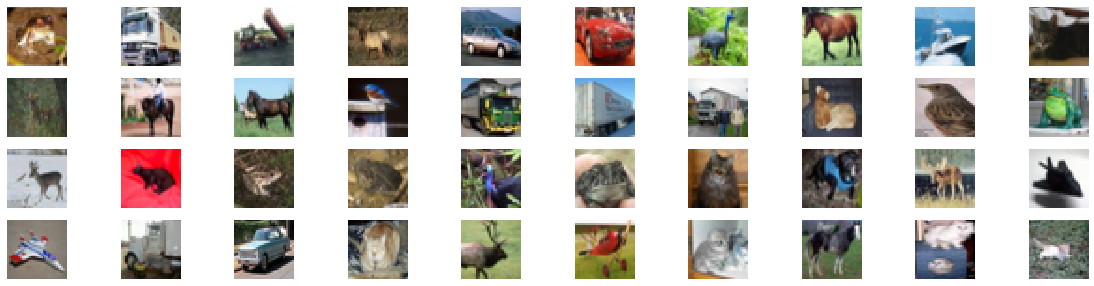

labels:  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6]


In [4]:
plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i]
    plt.imshow(example)
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])

In [28]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

**Questions 5-8: Redo Questions 1-4 with Cifar Dataset. The objective is 40% accuracy**

In [46]:
import copy
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
# x_train_gray = grayscale(x_train)
# x_test_gray = grayscale(x_test)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

# plt.figure(figsize=(20,5))
# for i in range(40):
#     plt.subplot(4, 10, i+1)
#     img_gray = x_train_gray[i]
    
    
#     plt.imshow(img_gray.squeeze())
#     plt.axis('off')
# plt.show()


# a = np.arange(25).reshape(5, 5, 1)
# print a.shape # (5, 5, 1)
# b = a.squeeze()
# print b.shape # (5, 5)

In [47]:
x_train_gray = x_train_gray.flatten().reshape(50000, 1024)
# x_train = x_train.reshape(60000,28,28)
x_test_gray = x_test_gray.flatten().reshape(10000, 1024)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(50000, 10)


In [82]:
model = Sequential()
model.add(Dense(470, input_dim=1024, activation='relu'))
model.add(Dropout(0.4))

# model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.1))

# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.2))


# model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.1))

# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.04))

# model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.04))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 470)               481750    
_________________________________________________________________
dropout_72 (Dropout)         (None, 470)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                4710      
Total params: 486,460
Trainable params: 486,460
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
# y_train = y_train[:50000]
# print(y_train.shape)
model.fit(x_train_gray, y_train,
          epochs=40,
          batch_size=256)

Epoch 1/40
50000/50000 [==============================] - 2s 38us/step - loss: 2.2303 - accuracy: 0.2009
Epoch 2/40
50000/50000 [==============================] - 2s 34us/step - loss: 2.0459 - accuracy: 0.2572
Epoch 3/40
50000/50000 [==============================] - 2s 34us/step - loss: 1.9956 - accuracy: 0.2794
Epoch 4/40
50000/50000 [==============================] - 2s 42us/step - loss: 1.9622 - accuracy: 0.2977
Epoch 5/40
50000/50000 [==============================] - 2s 42us/step - loss: 1.9361 - accuracy: 0.3094
Epoch 6/40
50000/50000 [==============================] - 2s 41us/step - loss: 1.9200 - accuracy: 0.3129
Epoch 7/40
50000/50000 [==============================] - 2s 41us/step - loss: 1.8944 - accuracy: 0.3227
Epoch 8/40
50000/50000 [==============================] - 2s 41us/step - loss: 1.8796 - accuracy: 0.3344
Epoch 9/40
50000/50000 [==============================] - 2s 41us/step - loss: 1.8684 - accuracy: 0.3379
Epoch 10/40
50000/50000 [==============================

In [84]:
# print(np.shape(y_test))
_, train_acc = model.evaluate(x_train_gray, y_train, batch_size= 256)
_, test_acc = model.evaluate(x_test_gray, y_test, batch_size= 256)
print('train_acc', train_acc)
print('test_acc', test_acc)

10000/10000 [==============================] - 0s 12us/step
train_acc 0.45754000544548035
test_acc 0.4142000079154968


Note: If you find your model does not work well, you may think about normalizing input data. More precisely, unlike MNIST (which input data is already normalized to in range [0,1]), input data of CIFAR is in range [0,255], which is not very input-friendly for Keras